<a href="https://colab.research.google.com/github/Loretta991/Drug-Response-Predictor/blob/main/Feature_Importance_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#⚠️ NOTE: This notebook was tested on Google Colab's default environment.
#Avoid upgrading `numpy`, `pandas`, or `seaborn` unless needed, as doing so may break compatibility.
#If you see Unicode warnings (e.g. missing emojis), you can safely ignore them or remove emojis from chart titles.


In [4]:
import pandas as pd
import numpy as np

# Generate dummy drug response data
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.randint(20, 80, 100),
    'Blood_Pressure': np.random.randint(90, 180, 100),
    'Cholesterol': np.random.randint(150, 300, 100),
    'Drug_Dosage': np.random.uniform(0.5, 5.0, 100),
    'Response': np.random.choice([0, 1], 100)  # 0 = No, 1 = Yes
})

# Save it to the sample_data directory
data.to_csv('/content/sample_data/drug_response_data.csv', index=False)
print("✅ Sample drug response dataset saved.")


✅ Sample drug response dataset saved.


In [5]:
# Load the data back in
df = pd.read_csv('/content/sample_data/drug_response_data.csv')

# Separate features and target
X = df.drop('Response', axis=1)
y = df['Response']


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model trained successfully.")


✅ Model trained successfully.


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached matplotlib-3.10.5-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (107 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached pillow-11.3.0-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadat

/tmp/ipython-input-1136960096.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='bright')
/tmp/ipython-input-1136960096.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


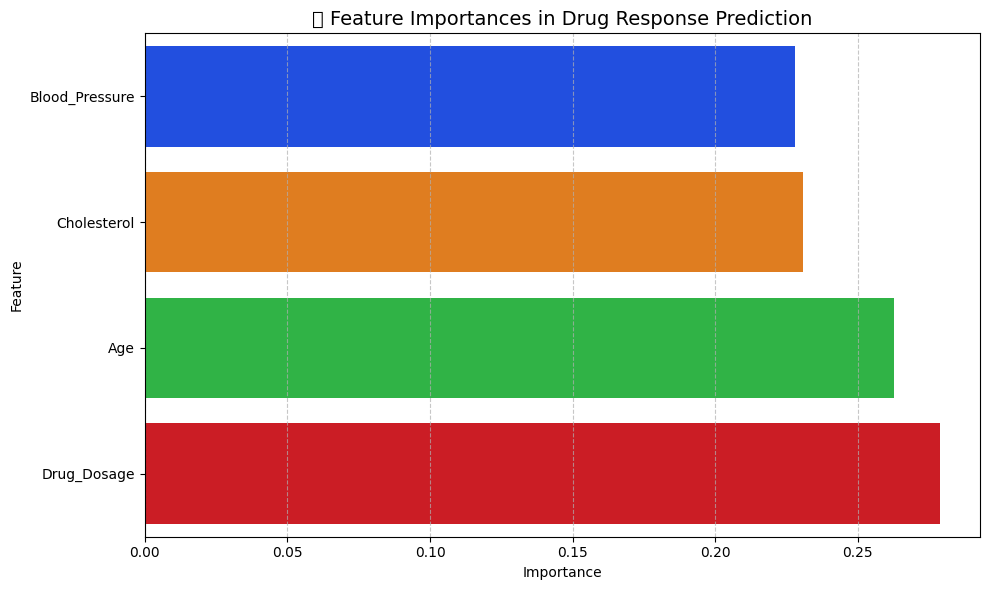

In [7]:
# ---------------------------------------------
# 🔍 Horizontal Feature Importance Visualization
# ---------------------------------------------
!pip install --upgrade --force-reinstall seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume X and model are already defined (from earlier training)
importances = model.feature_importances_
features = X.columns

# Create DataFrame for plotting
feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='bright')
plt.title('📊 Feature Importances in Drug Response Prediction', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
